<a href="https://colab.research.google.com/github/ayboska/4.33.23.1.02-AksobhyaSV/blob/main/Penugasan05_4.33.23.1.02_AksobhyaSamathaVarga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.33.23.1.02 - Aksobhya Samatha Varga

Jarak Euclidean antara Patch 1 dan Patch 2: 24.7650
Jarak Euclidean antara Patch 1 dan Patch 3: 5.0000
Jarak Manhattan antara Patch 1 dan Patch 2: 936.4392
Jarak Manhattan antara Patch 1 dan Patch 3: 250.0000


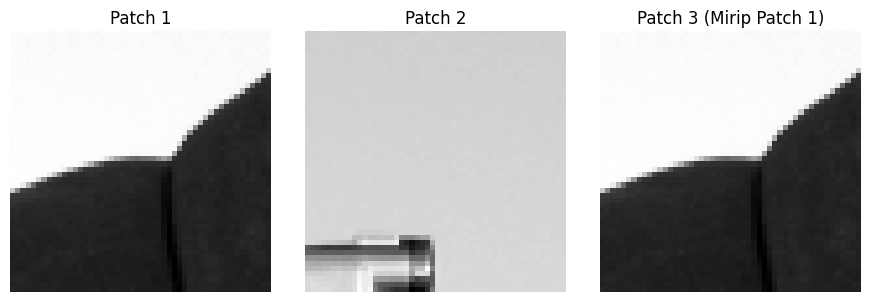

In [1]:
import numpy as np
from skimage import data, img_as_float
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. Buat dua patch citra sederhana atau ambil dari citra asli
image = img_as_float(data.camera())
patch1 = image[100:150, 100:150]
patch2 = image[100:150, 300:350]  # Patch dari lokasi berbeda
patch3 = patch1 + 0.1  # Patch1 dengan sedikit noise/perubahan intensitas
patch3 = np.clip(patch3, 0, 1)  # Pastikan nilai tetap di [0, 1]

# 2. Flatten patch menjadi vektor 1D
vec1 = patch1.flatten()
vec2 = patch2.flatten()
vec3 = patch3.flatten()

# 3. Hitung Jarak Euclidean (L2)
dist_l2_12 = distance.euclidean(vec1, vec2)
dist_l2_13 = distance.euclidean(vec1, vec3)

# 4. Hitung Jarak Manhattan (L1 - disebut 'cityblock' di scipy)
dist_l1_12 = distance.cityblock(vec1, vec2)
dist_l1_13 = distance.cityblock(vec1, vec3)

# 5. Tampilkan hasil dan patch
print(f"Jarak Euclidean antara Patch 1 dan Patch 2: {dist_l2_12:.4f}")
print(f"Jarak Euclidean antara Patch 1 dan Patch 3: {dist_l2_13:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 2: {dist_l1_12:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 3: {dist_l1_13:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].imshow(patch1, cmap='gray')
axes[0].set_title('Patch 1')
axes[0].axis('off')

axes[1].imshow(patch2, cmap='gray')
axes[1].set_title('Patch 2')
axes[1].axis('off')

axes[2].imshow(patch3, cmap='gray')
axes[2].set_title('Patch 3 (Mirip Patch 1)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): 0.8156
Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): 1.0000
Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Downsampled): 1.0000


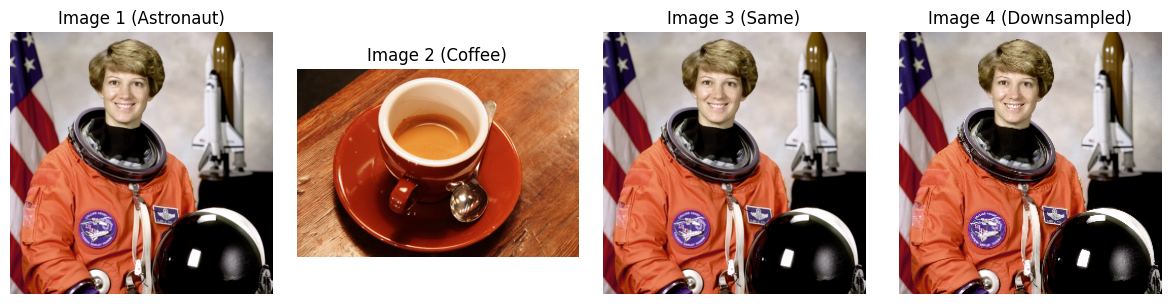

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from scipy.spatial import distance

# Fungsi untuk menghitung histogram RGB gabungan
def calculate_rgb_histogram(image, bins=16):
    img_uint8 = img_as_ubyte(image)
    hist_r, _ = np.histogram(img_uint8[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(img_uint8[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(img_uint8[:,:,2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_combined = hist_combined.astype(float) / np.sum(hist_combined)
    return hist_combined

# 1. Muat dua citra berwarna
try:
    image1 = data.astronaut()
    image2 = data.coffee()
    image3 = data.astronaut()
    image4 = image1[::2, ::2, :]
except Exception as e:
    print(f"Gagal memuat data skimage: {e}. Membuat citra dummy.")
    image1 = np.random.rand(100, 100, 3)
    image2 = np.random.rand(100, 100, 3) * 0.5
    image3 = image1.copy()
    image4 = image1[::2, ::2, :]

# 2. Hitung histogram untuk setiap citra
hist1 = calculate_rgb_histogram(image1)
hist2 = calculate_rgb_histogram(image2)
hist3 = calculate_rgb_histogram(image3)
hist4 = calculate_rgb_histogram(image4)

# 3. Hitung Cosine Similarity
sim_12 = 1 - distance.cosine(hist1, hist2)
sim_13 = 1 - distance.cosine(hist1, hist3)
sim_14 = 1 - distance.cosine(hist1, hist4)

# 4. Tampilkan hasil
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): {sim_12:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): {sim_13:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Downsampled): {sim_14:.4f}")

# 5. Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image1)
axes[0].set_title('Image 1 (Astronaut)')
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].set_title('Image 2 (Coffee)')
axes[1].axis('off')

axes[2].imshow(image3)
axes[2].set_title('Image 3 (Same)')
axes[2].axis('off')

axes[3].imshow(image4)
axes[3].set_title('Image 4 (Downsampled)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


SSIM (Ref vs Same): 1.0000
SSIM (Ref vs Noisy): 0.2957
SSIM (Ref vs Contrast): 0.9651
SSIM (Ref vs Blurred): 0.8027


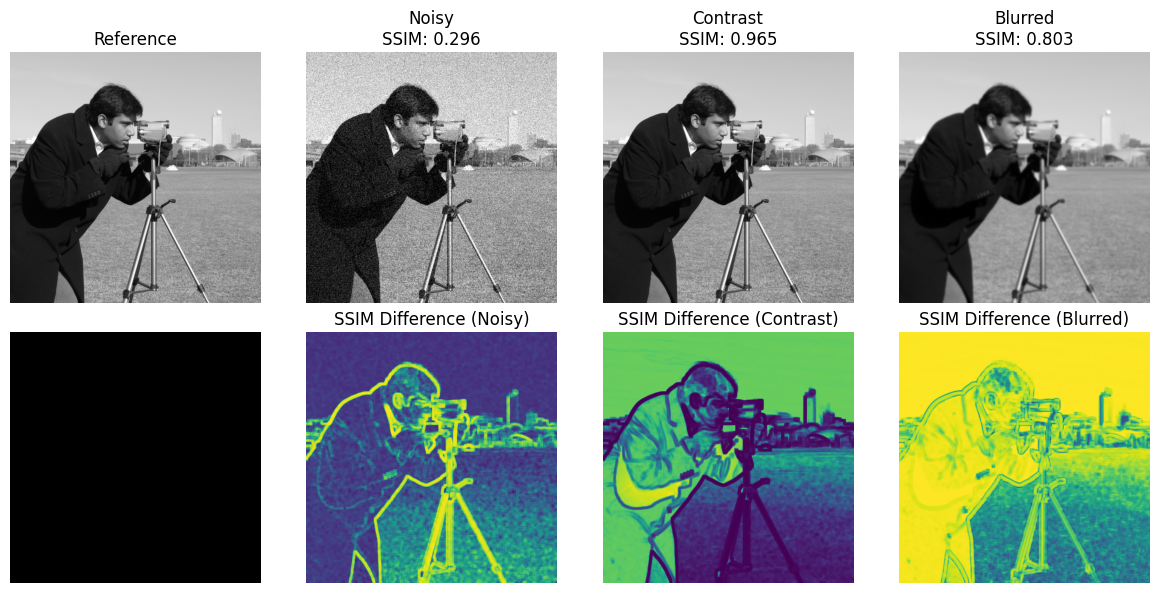

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters import gaussian

# 1. Muat citra referensi
image_ref = img_as_float(data.camera())

# 2. Buat beberapa versi citra yang terdistorsi
image_same = image_ref.copy()
image_noisy = random_noise(image_ref, mode='gaussian', var=0.01)
image_contrast = np.clip(image_ref * 0.8, 0, 1)
image_blurred = gaussian(image_ref, sigma=1.5, channel_axis=None)

# 3. Hitung SSIM (Structural Similarity Index)
data_range = image_ref.max() - image_ref.min()
ssim_same, _ = ssim(image_ref, image_same, data_range=data_range, full=True)
ssim_noisy, diff_noisy = ssim(image_ref, image_noisy, data_range=data_range, full=True)
ssim_contrast, diff_contrast = ssim(image_ref, image_contrast, data_range=data_range, full=True)
ssim_blurred, diff_blurred = ssim(image_ref, image_blurred, data_range=data_range, full=True)

# 4. Tampilkan nilai SSIM
print(f"SSIM (Ref vs Same): {ssim_same:.4f}")
print(f"SSIM (Ref vs Noisy): {ssim_noisy:.4f}")
print(f"SSIM (Ref vs Contrast): {ssim_contrast:.4f}")
print(f"SSIM (Ref vs Blurred): {ssim_blurred:.4f}")

# 5. Visualisasi citra dan perbedaan SSIM
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(image_ref, cmap='gray')
ax[0].set_title('Reference')
ax[0].axis('off')

ax[1].imshow(image_noisy, cmap='gray')
ax[1].set_title(f'Noisy\nSSIM: {ssim_noisy:.3f}')
ax[1].axis('off')

ax[2].imshow(image_contrast, cmap='gray')
ax[2].set_title(f'Contrast\nSSIM: {ssim_contrast:.3f}')
ax[2].axis('off')

ax[3].imshow(image_blurred, cmap='gray')
ax[3].set_title(f'Blurred\nSSIM: {ssim_blurred:.3f}')
ax[3].axis('off')

ax[4].imshow(np.zeros_like(image_ref), cmap='gray')
ax[4].set_title('')
ax[4].axis('off')

ax[5].imshow(diff_noisy, cmap='viridis')
ax[5].set_title('SSIM Difference (Noisy)')
ax[5].axis('off')

ax[6].imshow(diff_contrast, cmap='viridis')
ax[6].set_title('SSIM Difference (Contrast)')
ax[6].axis('off')

ax[7].imshow(diff_blurred, cmap='viridis')
ax[7].set_title('SSIM Difference (Blurred)')
ax[7].axis('off')

plt.tight_layout()
plt.show()


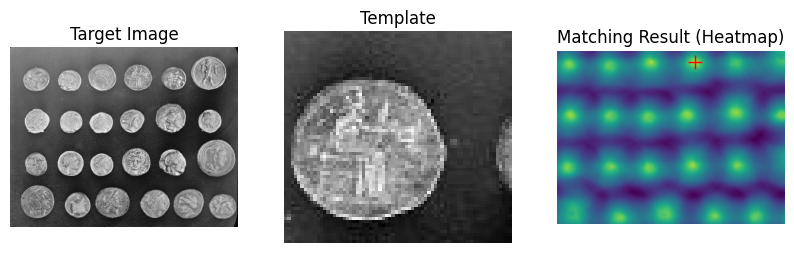

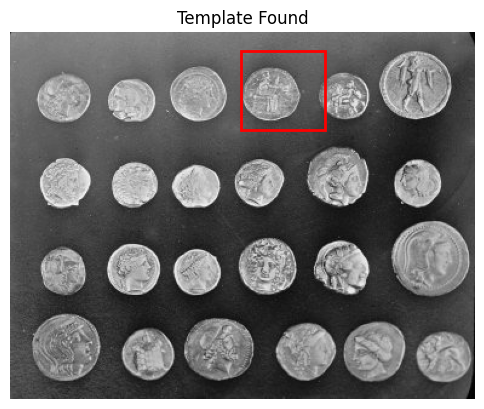

Template ditemukan di koordinat (x,y): (190, 15)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

# 1. Muat citra target dan template
image = data.coins()
template = image[15:80, 190:260]  # Ambil salah satu koin sebagai template

# 2. Lakukan template matching
result = match_template(image, template)

# 3. Temukan lokasi terbaik (skor tertinggi)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]  # Koordinat sudut kiri atas

# 4. Visualisasi hasil
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].axis('off')

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].axis('off')

ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].axis('off')
ax[2].plot(x, y, 'r+', markersize=10)  # Tandai titik terbaik

# Kotak hasil matching pada citra asli
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.axis('off')
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

print(f"Template ditemukan di koordinat (x,y): ({x}, {y})")


Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (semakin ke kanan, semakin tidak mirip):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


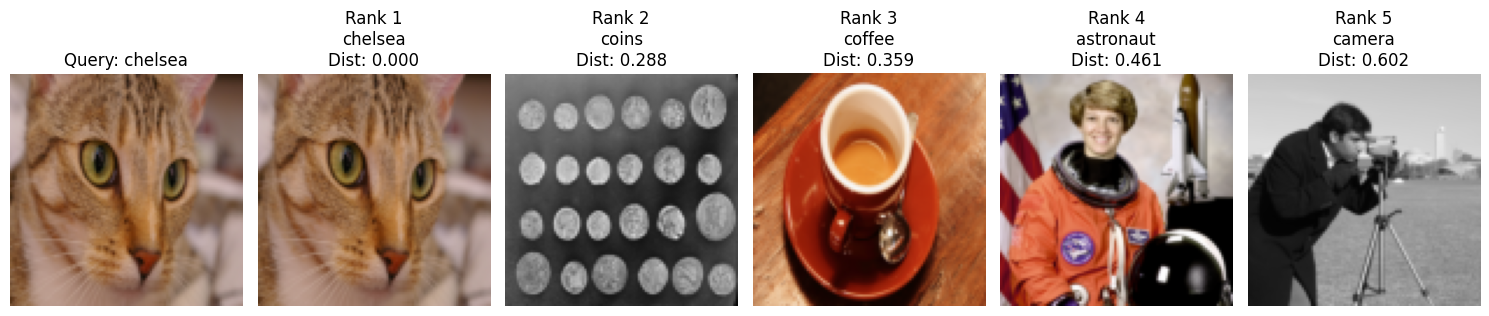

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_ubyte
from scipy.spatial import distance

# Fungsi menghitung histogram RGB
def calculate_rgb_histogram(image, bins=16):
    if image.dtype == float:
        image = img_as_ubyte(image)
    hist_r, _ = np.histogram(image[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:,:,2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_sum = np.sum(hist_combined)
    if hist_sum > 0:
        hist_combined = hist_combined.astype(float) / hist_sum
    else:
        hist_combined = hist_combined.astype(float)
    return hist_combined

# 1. Siapkan database citra
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# 2. Pilih query image
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]

# 3. Hitung jarak cosine
distances = []
for i, hist in enumerate(database_hists):
    dist = distance.cosine(query_hist, hist)
    distances.append(dist)

# 4. Urutkan berdasarkan jarak
sorted_indices = np.argsort(distances)

# 5. Visualisasi hasil
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(15, 3))

axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

print("\nHasil Retrieval (semakin ke kanan, semakin tidak mirip):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()


Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (Mean RGB + Euclidean):
Rank 1: chelsea (Distance: 0.000)
Rank 2: astronaut (Distance: 0.050)
Rank 3: coffee (Distance: 0.176)
Rank 4: camera (Distance: 0.194)
Rank 5: coins (Distance: 0.211)


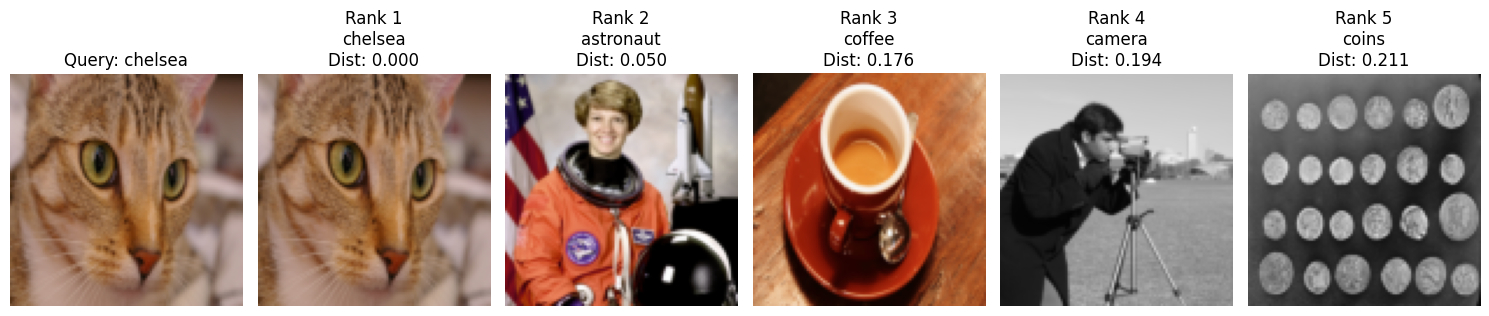

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_float
from scipy.spatial import distance

# Fungsi menghitung fitur mean RGB
def calculate_mean_rgb(image):
    if image.ndim == 2:
        image = color.gray2rgb(image)
    image = img_as_float(image)
    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])
    return np.array([mean_r, mean_g, mean_b])

# Siapkan database
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_features = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_features.append(calculate_mean_rgb(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# Query: "chelsea"
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_feature = database_features[query_index]

# Hitung jarak Euclidean
distances = []
for feature in database_features:
    dist = distance.euclidean(query_feature, feature)
    distances.append(dist)

# Urutkan hasil
sorted_indices = np.argsort(distances)

# Tampilkan
fig, axes = plt.subplots(1, len(database_images) + 1, figsize=(15, 3))
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

print("\nHasil Retrieval (Mean RGB + Euclidean):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()


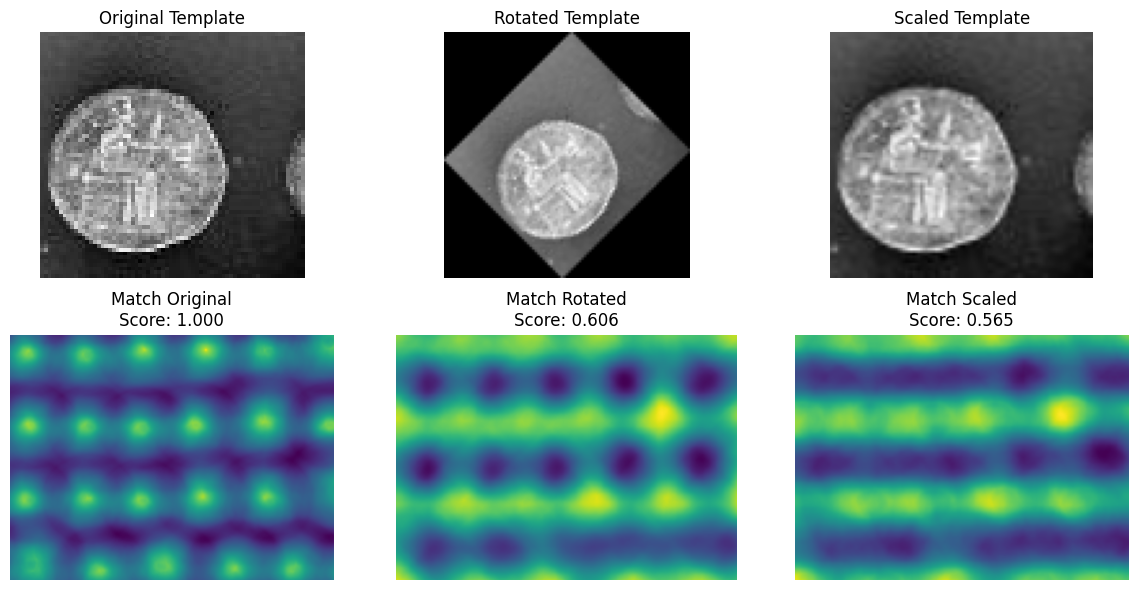

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, transform
from skimage.feature import match_template

# 1. Ambil citra target dan template awal
image = data.coins()
template_orig = image[15:80, 190:260]  # Koordinat asli template

# 2. Modifikasi template
template_rotated = transform.rotate(template_orig, angle=45, resize=True)
template_scaled = transform.rescale(template_orig, scale=1.5, anti_aliasing=True)

# 3. Matching menggunakan template asli, diputar, dan diperbesar
result_orig = match_template(image, template_orig)
result_rotated = match_template(image, template_rotated)
result_scaled = match_template(image, template_scaled)

# 4. Temukan koordinat terbaik
def get_best_location(result):
    ij = np.unravel_index(np.argmax(result), result.shape)
    return ij[::-1], np.max(result)  # (x, y), score

loc_orig, score_orig = get_best_location(result_orig)
loc_rotated, score_rotated = get_best_location(result_rotated)
loc_scaled, score_scaled = get_best_location(result_scaled)

# 5. Visualisasi hasil
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Baris 1: Template
axes[0, 0].imshow(template_orig, cmap='gray')
axes[0, 0].set_title("Original Template")
axes[0, 1].imshow(template_rotated, cmap='gray')
axes[0, 1].set_title("Rotated Template")
axes[0, 2].imshow(template_scaled, cmap='gray')
axes[0, 2].set_title("Scaled Template")

# Baris 2: Hasil Matching
axes[1, 0].imshow(result_orig, cmap='viridis')
axes[1, 0].set_title(f"Match Original\nScore: {score_orig:.3f}")
axes[1, 1].imshow(result_rotated, cmap='viridis')
axes[1, 1].set_title(f"Match Rotated\nScore: {score_rotated:.3f}")
axes[1, 2].imshow(result_scaled, cmap='viridis')
axes[1, 2].set_title(f"Match Scaled\nScore: {score_scaled:.3f}")

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()
